In [1]:
from datascience import *
import sympy
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

# Cournot Competition

One model of understanding oligopolies comes in Cournot competition, named for Aontoine Cournot who first proposed it. Cournot competition is a model describing a market in which firms compete by changing their output. In Cournot competition, there are a fixed number of firms in a market that produce the same product. Firms do not collude but have market power (i.e. each firm’s output decisions affect the price of the good). Each firm knows the number of firms in the market and has its own cost function that it uses to determine its level of output.

OPEC is a good example of a Cournot oligopoly: its participants affect prices by changing their output. OPEC also demonstrates a flaw in the reasoning behind Cournot competition: the equilibrium state of a Cournot oligopoly suggests that collusion by market participants is the rational policy, but in reality game theory shows us this cannot be the “true” equilibrium because cartel members undercut one another in a bid for market share.

## Cournot Profit Functions
For the purposes of this class, we will be analyzing the case of Cournot duopoly (i.e. when there are only 2 firms in a market). Throughout the course we will make these assumptions about the market: both firms have to follow a joint linear price function (meaning the market price is determined only by the quantity produced of both firms) and both firms have an equal constant marginal cost curve. To put this formally, $P=P(Q)=P(q_1+q_2)=m(q_1+q_2)+b$ (where $m$ and $b$ are parameters for the slope and intercept of the price functions). Costs for firm 1 can be represented as $C_1=cq_1$ and costs for firm 2 can be represented as $C_2=cq_2$. To find the equilibrium of this game we will need to set up the profit functions for both firms. Starting with firm 1 we can put the last two equations together to get:

$$
\begin{equation} \label{eq1}
\begin{split}
\pi_1 & =Pq_1-C_1 \\
 & =(m(q_1+q_2)+b)q_1-cq_1 \\
 & =mq_1^2+mq_1q_2+bq_1 -cq_1
\end{split}
\end{equation}
$$

Firm 2 follows a similar profit function:

$$
\begin{align*}
\pi_2 & =Pq_2-C_2\\
 & =mq_2^2+mq_1q_2+bq_2 -cq_2   
\end{align*}
$$

## Best Response Functions
Similar to how in the utility unit individuals seek to maximize utility, in Cournot firms seek to maximize profit. So we will be using the same mathematical tool we learned last week (partial derivatives) to derive the equilibrium of this game. Specifically we will be solving for a $q_1^{*}$ that satisfies $ \underset{q_1}{\mathrm{argmax}}\ \pi_1 \ \textrm{or} \ \underset{q_1}{\mathrm{argmax}}\ (mq_1^2+mq_1q_2+bq_1 -cq_1)$. In english, this means we will be finding the value (or values) of $q_1$ that maximize the profit function for player 1. We will also do the same thing for player 2. Starting with player 1, let's take the partial derivative with respect to $q_1$ and set that equation equal to 0. We can then solve that equation to obtain $q_1^{*}$. 

$$
\begin{align*}
   \frac{\partial{\pi_1}}{\partial{q_1}}= 2mq_1 + mq_2+b - c \\
   2mq_1 + mq_2+b - c = 0\\
  q_1^{*}= \frac{c-mq_2-b}{2m}
\end{align*}
 \
$$
This equation for $q_1$ is called a best response function because it tells us player 1's optimal output for every possible output player 2 can choose. Now, in order to get the equilibrium, we need to find player 2's best response function. We will use the same approach to do this (i.e., we will solve for a $q_2^{*}$ that satisfies $\underset{q_2}{\mathrm{argmax}}\ \pi_2 \ \textrm{or} \ \underset{q_2}{\mathrm{argmax}}\ mq_2^2+mq_1q_2+bq_2 -cq_2$ ).
 
$$
 \begin{align*}
   \frac{\partial{\pi_2}}{\partial{q_2}}= 2mq_2 + mq_1+b - c \\ 
   2mq_2 + mq_1+b - c = 0\\
   q_2^{*} = \frac{c-mq_1-b}{2m}
\end{align*}
$$

If $q_2$ was fixed at a certain price and we were to graph firm 1's best response equation, it would look something like this:

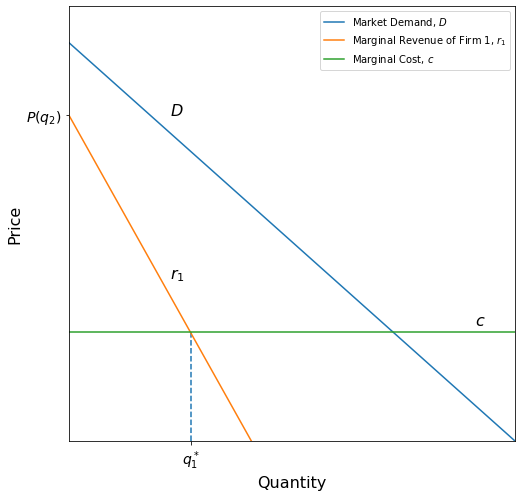

In [2]:
m, b = -0.5, 9
q_2 = 4
c = 3
D_fn = lambda x: m * x + b + 2
P = lambda x: D_fn(x + q_2)
r_1_fn = lambda x: 2 * m * x + m * q_2 + b + 2
r_1_inv = lambda x: (x - m * q_2 - b - 2) / 2 / m

q_1 = np.linspace(0, 25, 1000)
D = D_fn(q_1)
d_1 = P(q_1)
r_1 = r_1_fn(q_1)

q_1_prime = r_1_inv(c)

plt.figure(figsize=[8,8])

# demand
plt.plot(q_1, D, label=r"Market Demand, $D$")
plt.text(5, b, r"$D$", size=16)



# marginal revenue
plt.plot(q_1, r_1, label=r"Marginal Revenue of Firm 1, $r_1$")
plt.text(5, b - 4.5, r"$r_1$", size=16)

# marginal cost
plt.plot(q_1, c * np.ones_like(q_1), label=r"Marginal Cost, $c$")
plt.text(20, 3.2, r"$c$", size=16)

# optimum quantity
plt.vlines(q_1_prime, 0, 3, linestyles="dashed")



plt.xlim([0,22])
plt.ylim([0,12])
plt.xticks([r_1_inv(c)], [r"$q_1^*$"], size=14)
plt.yticks([P(0)], [r"$P(q_2)$"], size=14)
plt.xlabel("Quantity", size=16)
plt.ylabel("Price", size=16)
plt.legend();

This may make intuitive sense as if you recall from the demand and supply chapters, firms seek to produce where marginal revenue equals marginal cost. The partial derivative we took before did that automatically. We can verify this with the following calculation:  

$$
\begin{align*}
    MR=MC  \\
    MR-MC=0  \\
    \frac{\partial}{\partial{q_1}} (\textrm{Revenue - Cost}) = 0 \\
    \frac{\partial}{\partial{q_1}} ((m(q_1+q_2)+b)q_1-cq_1) = 0 \\
    2mq_1 + mq_2+b - c = 0 
\end{align*}
$$

However, this graph assumes a fixed value for $q_2$. Let's try varying $q_2$ and see what happens.

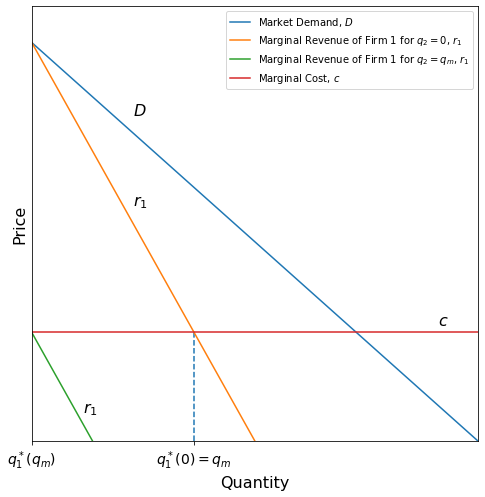

In [3]:
m, b = -0.5, 9
q_2 = 0
c = 3
D_fn = lambda x: m * x + b + 2
P = lambda x: D_fn(x + q_2)
r_1_fn = lambda x: 2 * m * x + m * q_2 + b + 2
r_1_inv = lambda x: (x - m * q_2 - b - 2) / 2 / m

q_1 = np.linspace(0, 25, 1000)
D = D_fn(q_1)
d_1 = P(q_1)
r_1 = r_1_fn(q_1)

q_1_prime = r_1_inv(c)

plt.figure(figsize=[8,8])

# demand
plt.plot(q_1, D, label=r"Market Demand, $D$")
plt.text(5, b, r"$D$", size=16)


# marginal revenue
plt.plot(q_1, r_1, label=r"Marginal Revenue of Firm 1 for $q_2=0$, $r_1$")
plt.text(5, b - 2.5, r"$r_1$", size=16)

# case when q_2 = q_c
m, b = -0.5, 9
q_2 = 16
c = 3
D_fn = lambda x: m * x + b + 2
P = lambda x: D_fn(x + q_2)
r_1_fn = lambda x: 2 * m * x + m * q_2 + b + 2
r_1_inv = lambda x: (x - m * q_2 - b - 2) / 2 / m

q_1 = np.linspace(0, 25, 1000)
D = D_fn(q_1)
d_1 = P(q_1)
r_1 = r_1_fn(q_1)


# marginal revenue
plt.plot(q_1, r_1, label=r"Marginal Revenue of Firm 1 for $q_2=q_m$, $r_1$")
plt.text(2.5, 0.8, r"$r_1$", size=16)

# marginal cost
plt.plot(q_1, c * np.ones_like(q_1), label=r"Marginal Cost, $c$")
plt.text(20, 3.2, r"$c$", size=16)


# q'_1(0)
plt.vlines(r_1_inv(-5), 0, 3, linestyles="dashed")

plt.xlim([0,22])
plt.ylim([0,12])
plt.xticks([r_1_inv(-5), 0], [r"$q_1^*(0) = q_m$", r"$q_1^*(q_m)$"], size=14)
plt.yticks([], [], size=14)
plt.xlabel("Quantity", size=16)
plt.ylabel("Price", size=16)
plt.legend();

The orange marginal revenue curve represents a scenario where Firm 2 produces so little that Firm 1 can overtake the market and become a monopoly. The green marginal revenue curve is a scenario where Firm 2 produces so much that it is too costly for Firm 1 to remain in this market, causing Firm 1's optimal output to become 0. 

Let's now try to solve for the Nash Equilibrium of this game.

## Cournot Equilibrium
Recall that a Nash Equilibrium is where both the players are giving the best response to each other's actions. Graphically, this is where the best response curves intersect. 

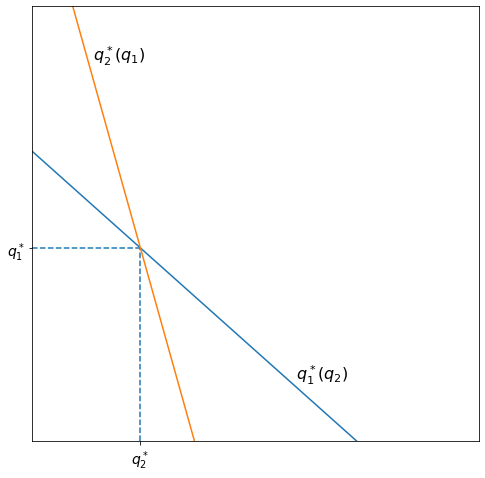

In [4]:
q_m = r_1_inv(-5)
q_c = D_fn(-10)

p1 = (0, q_m)
p2 = (q_c, 0)

slope = (p2[1] - p1[1]) / (p2[0]- p1[0])
intercept = p1[1] - slope * p1[0]

xs = np.linspace(0, 25, 1000)
ys1 = slope * xs + intercept
ys2 = (xs - intercept) / slope

plt.figure(figsize=[8,8])

plt.plot(xs, ys1, label=r"$q'_1$")
plt.plot(xs, ys2, label=r"$q'_2$")
plt.text(13, intercept - 6.3, r"$q_1^*(q_2)$", size=16)
plt.text(3, intercept + 2.5, r"$q_2^*(q_1)$", size=16)

x_star = - (slope + 1) * intercept / (slope**2 - 1)
y_star = slope * x_star + intercept
plt.vlines(x_star, 0, y_star, linestyle="dashed")
plt.hlines(y_star, 0, x_star, linestyle="dashed")

plt.xlim([0,22])
plt.ylim([0,12])
plt.xticks([x_star], [r"$q_2^*$"], size=14)
plt.yticks([y_star], [r"$q_1^*$"], size=14);

In this class, you will use Python to find that intersection. However, for future classes, it may be useful to see how you can find the intersection algebraically. Here's the equation we must solve:

$$
\begin{align*}
    q_1=\frac{c-b-m(\frac{c-mq_1-b}{2m})}{2m}
\end{align*}
\
$$

To find player 1's equilibrium strategy, we solve for $q_1$. 

$$
\begin{align*}
    q_1=\frac{c-b-m(\frac{c-mq_1-b}{2m})}{2m} \\ 
    2mq_1 = c-b-m(\frac{c-mq_1-b}{2m}) \\
    2mq_1 = c-b-\frac{c-mq_1-b}{2}\\
    2mq_1 - \frac{mq_1}{2} = c - \frac{c}{2} -b +\frac{b}{2} \\
    \frac{3mq_1}{2} = \frac{c-b}{2} \\ 
    3mq_1 = c-b \\
    q_1^{*} = \frac{c-b}{3m}
\end{align*}
\
$$

Phew, that was a lot of math. However, we are not quite done yet - we still need to find player 2's optimal output. The process for doing this is fairly similar to the process for finding player 1's optimal output, as can be seen below. 

$$
\begin{align*}
    q_2 = \frac{c-mq_1^{*}-b}{2m} = \frac{c-b-m(\frac{c-b}{3m})}{2m} \\
    2mq_2 = c -\frac{c}{3} - b +\frac{b}{3} \\
    2mq_2 = \frac{2(c-b)}{3}\\
    q_2^{*} = q_2 = \frac{c-b}{3m}
\end{align*}
\
$$
This shows that the unique Nash Equilibrium of Cournot Duopoly is $(q_1^{*},q_2^{*}) = (\frac{c-b}{3m},\frac{c-b}{3m})$

## Implications
The Cournot model implies that output is greater in a Cournot duopoly than in a monopoly but still lower than perfect competition. Prices are also lower in a Cournot duopoly, but higher than perfect competition. Cournot equilibria are also a subset of Nash equilibria, and so the equilibrium we just derived is one from which neither player will likely deviate. As noted earlier, Cournot also indicates that members of a duopoly could form a cartel and raise profits by colluding.


### Applying Cournot
Now that we have shown how to derive the Cournot equilibrium, let’s apply this to a problem. Consider the industry of airline manufacturing: there are two main competitors, Boeing and Airbus, and for this problem, we will think of this market as a Cournot duopoly. Suppose the market demand curve is given by $P=-1.89Q+148.89$ where the price is in millions of dollars and that the marginal cost of both firms is constant at $c=100$. Solve for the Nash Equilibrium. 


First we will want to derive both firms profit functions:

$$
\begin{align*} 
    \pi_1 & = Pq_1 -cq_1 \\
    \pi_1 & = (-1.89Q+148.89)q_1 - cq_1 \\
    \pi_1 & = (-1.89(q_1+q_2)+148.89)q_1 -cq_1 \\
    \pi_1 & = -1.89q_1^2-1.89q_1q_2+148.89q_1 - cq_1
\end{align*}
$$

For firm 2 the profit function similarly looks like:

$$
\begin{align*}
    \pi_2 = -1.89q_2^2-1.89q_1q_2+148.89q_2 - cq_2
\end{align*}
$$

Now we will take the partial derivative to find the best response functions for both players. For firm 1 this looks like:

$$
\begin{align*}
    \frac{\partial{\pi_1}}{\partial{q_1}}= -3.78q_1 - 1.89q_2+148.89 - 100 = 0\\
    q_1 = \frac{48.89-1.89q_2}{3.78}
\end{align*}
\
$$

For firm 2 this looks like:

$$
\begin{align*}
    \frac{\partial{\pi_2}}{\partial{q_2}}= -3.78q_2 - 1.89q_1+148.89 - 100 = 0\\
    q_2 = \frac{48.89-1.89q_1}{3.78}
\end{align*}
$$

Now while you can solve this algebraically, it takes much longer and leaves a lot of room for error, so as data scientists we will use Python to solve this problem. The code for this looks like this:

In [5]:
q_1=sympy.Symbol("q_1") #Create a symbol for q1
q_2=sympy.Symbol("q_2")#Create a symbol for q2
Br_q_1 = (48.89 - 1.89*q_2)/3.78 #Create the best response function for firm 1
Br_q_2 = (48.89 - 1.89*q_1)/3.78 #Create the best response function for firm 2
q1_Br_2 = (48.89-3.78*q_2)/1.89 #Solve firm 2's best response function for q1
q_1_star = solve(Br_q_1,q1_Br_2) #Use the solve function to solve the system of equations 
q_2_star = Br_q_2.subs(q_1,q_1_star ) #Substiute in the optimal q_1_star into firm 2's best response function
(q_1_star,q_2_star) #Nash Equilibrium

(8.62257495590827, 8.62257495590830)